In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# creating a dataframe
df = pd.read_csv('Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#removing all duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
#checking null values
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
# checking the datatypes using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# checking mathematical summaries
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


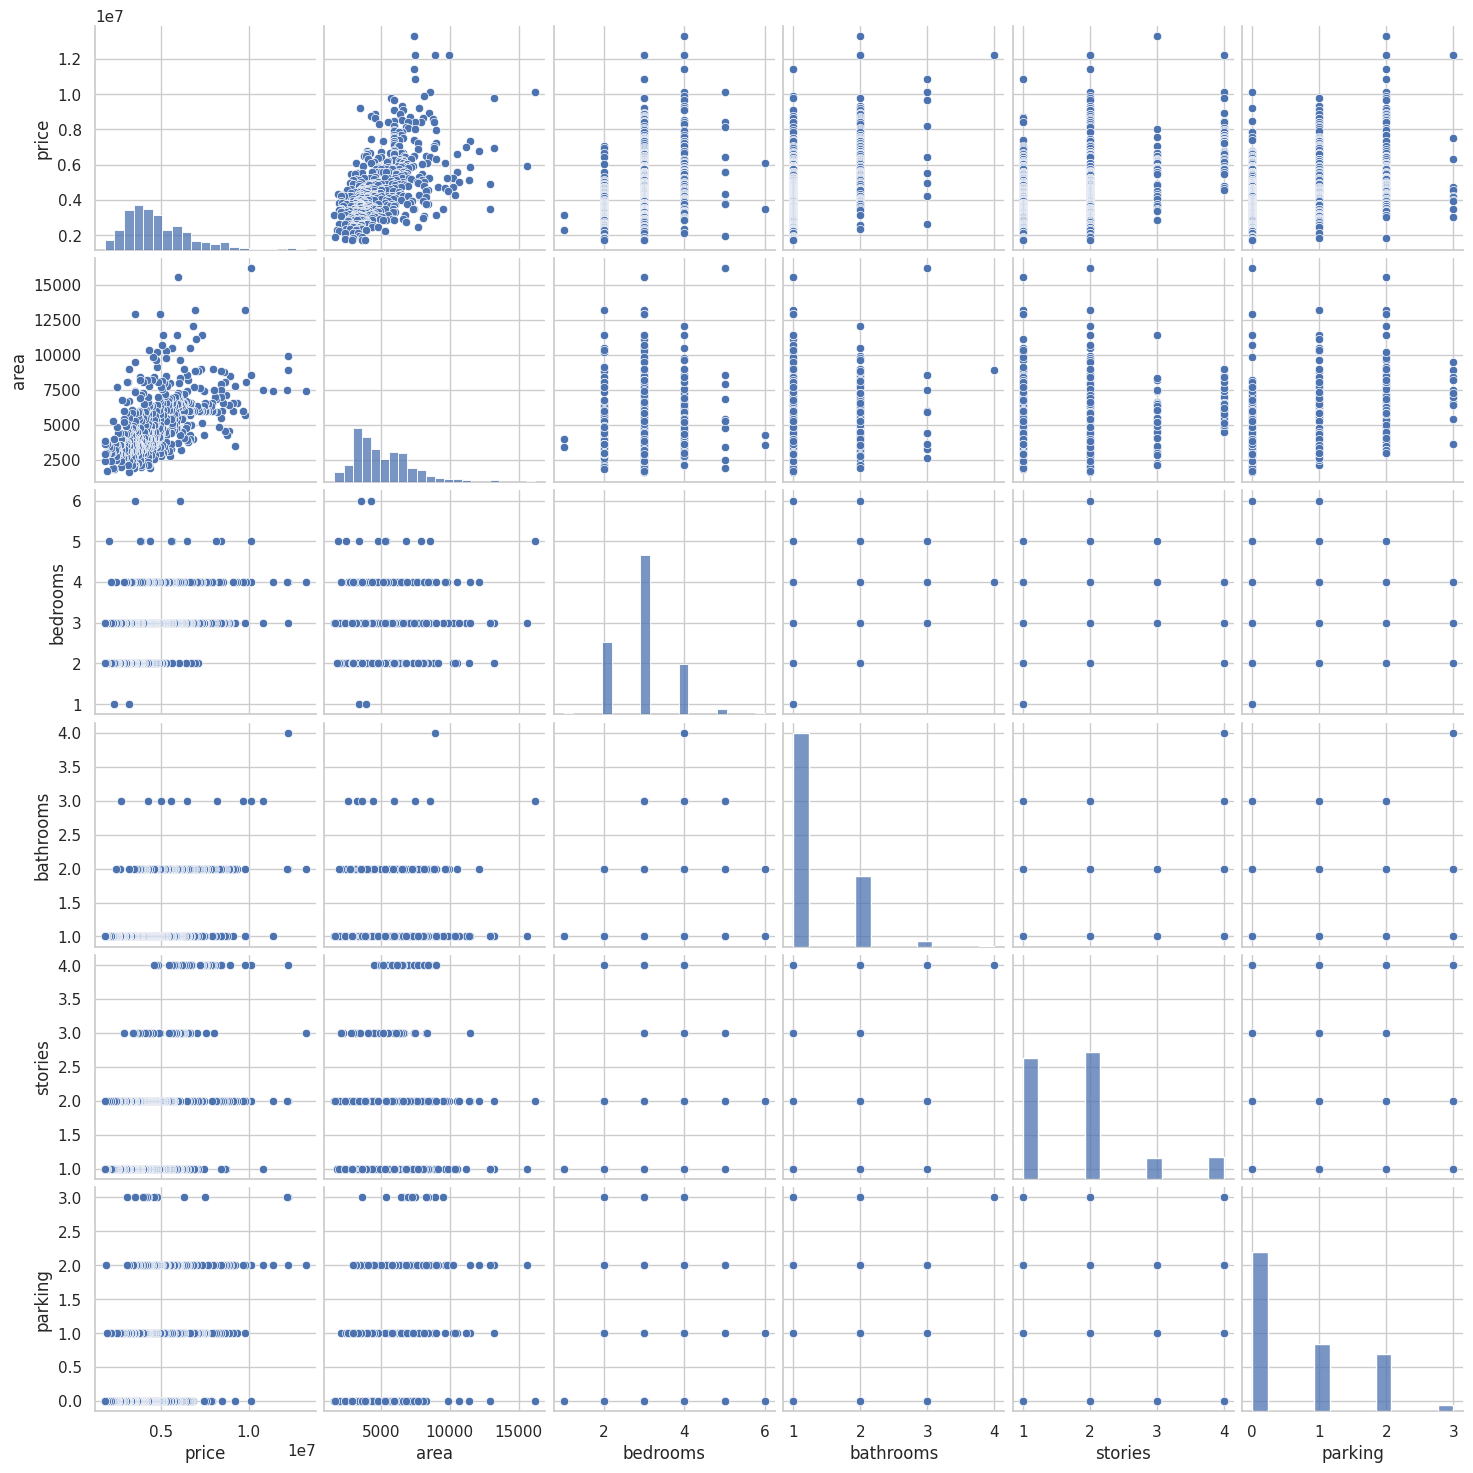

In [ ]:
#analyzing data
sns.pairplot(df)

In [ ]:
# remove outliers
L=['area','price']
# df1=df.select_dtypes(exclude='object')

In [ ]:
for i in L:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df=df[(df[i]>=lower_bound) & (df[i]<=upper_bound)]

In [ ]:
df.shape

(518, 13)

In [ ]:
# Automated Encoding of Categorical Variables
# Step 1: Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns  # Identify columns with categorical data

# Step 2: Encode categorical columns using LabelEncoder
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()  # Initialize LabelEncoder
    df[column] = le.fit_transform(df[column])  # Apply the encoder to each categorical column
    label_encoders[column] = le  # Store the encoder for potential inverse transformation

In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [ ]:

# Separate features (X) and target variable (y)
X = df.drop(columns=['price'])  # X contains all columns except 'price'
y = df['price']  # y is the target variable, which is 'price'

# Split the data into training and testing sets
# We use an 80-20 split: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()


In [ ]:

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict house prices using the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using various metrics

# 1. Mean Squared Error (MSE)
# Measures the average of the squares of the errors (the difference between predicted and actual values)
mse = mean_squared_error(y_test, y_pred)

# 2. R-squared (R2)
# This tells us the proportion of variance in the dependent variable (price) that can be predicted from the independent variables
r2 = r2_score(y_test, y_pred)

# 3. Mean Absolute Error (MAE)
# It calculates the average of the absolute errors (the absolute difference between predicted and actual values)
mae = mean_absolute_error(y_test, y_pred)

# Display the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.3795885782306465
R-squared (R2): 0.7139823947759645
Mean Absolute Error (MAE): 0.46518621704197555


#Summary of Model Performance:
##Mean Squared Error (MSE):

Value: 0.3796
Interpretation: MSE is the average squared difference between the actual and predicted values. The smaller the MSE, the better the model is at predicting the target variable. Here, the MSE is relatively low, indicating that the model predictions are fairly accurate, but there is still some variance in the predictions.
##R-squared (R²):

Value: 0.7140
Interpretation: R-squared represents the proportion of the variance in the target variable (price) that is explained by the independent variables. In this case, approximately 71.4% of the variance is explained by the model. This suggests that the model is reasonably good but has room for improvement.
##Mean Absolute Error (MAE):

Value: 0.4652
Interpretation: MAE measures the average absolute difference between the predicted and actual values. Like MSE, the smaller the MAE, the better the model. Here, the average error is 0.4652 units, showing that the model predictions are reasonably close to the actual values.
###Overall Assessment:
The model has a decent performance, explaining about 71.4% of the variance (R²), but there is some prediction error indicated by the MSE and MAE values. Further improvements could be made by tuning the model, adding more features, or trying other algorithms to reduce the error rates.







In [ ]:
corr_matrix=df.corr()

In [ ]:
corr_matrix

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.533129,0.324234,0.471239,0.446331,0.308743,0.297541,0.179092,0.078286,0.475312,0.316950,0.280308,-0.305371
area,0.533129,1.000000,0.121588,0.179846,0.096649,0.300278,0.197426,0.036633,-0.023069,0.256656,0.353318,0.204702,-0.152392
bedrooms,0.324234,0.121588,1.000000,0.348762,0.407683,-0.027928,0.073816,0.094644,0.044051,0.148062,0.100377,0.057297,-0.119118
bathrooms,0.471239,0.179846,0.348762,1.000000,0.308518,0.025831,0.142821,0.124553,0.045725,0.173094,0.129623,0.026133,-0.153508
stories,0.446331,0.096649,0.407683,0.308518,1.000000,0.118875,0.035034,-0.168670,0.028633,0.291094,0.019854,0.018171,-0.107162
mainroad,0.308743,0.300278,-0.027928,0.025831,0.118875,1.000000,0.093078,0.039530,-0.019637,0.101599,0.195395,0.193104,-0.151431
guestroom,0.297541,0.197426,0.073816,0.142821,0.035034,0.093078,1.000000,0.370977,-0.021757,0.132730,0.039993,0.176521,-0.134329
basement,0.179092,0.036633,0.094644,0.124553,-0.168670,0.039530,0.370977,1.000000,-0.011285,0.038451,0.033166,0.232181,-0.106166
hotwaterheating,0.078286,-0.023069,0.044051,0.045725,0.028633,-0.019637,-0.021757,-0.011285,1.000000,-0.119404,0.052938,-0.040852,-0.012038
airconditioning,0.475312,0.256656,0.148062,0.173094,0.291094,0.101599,0.132730,0.038451,-0.119404,1.000000,0.130813,0.087660,-0.144159


<Axes: >

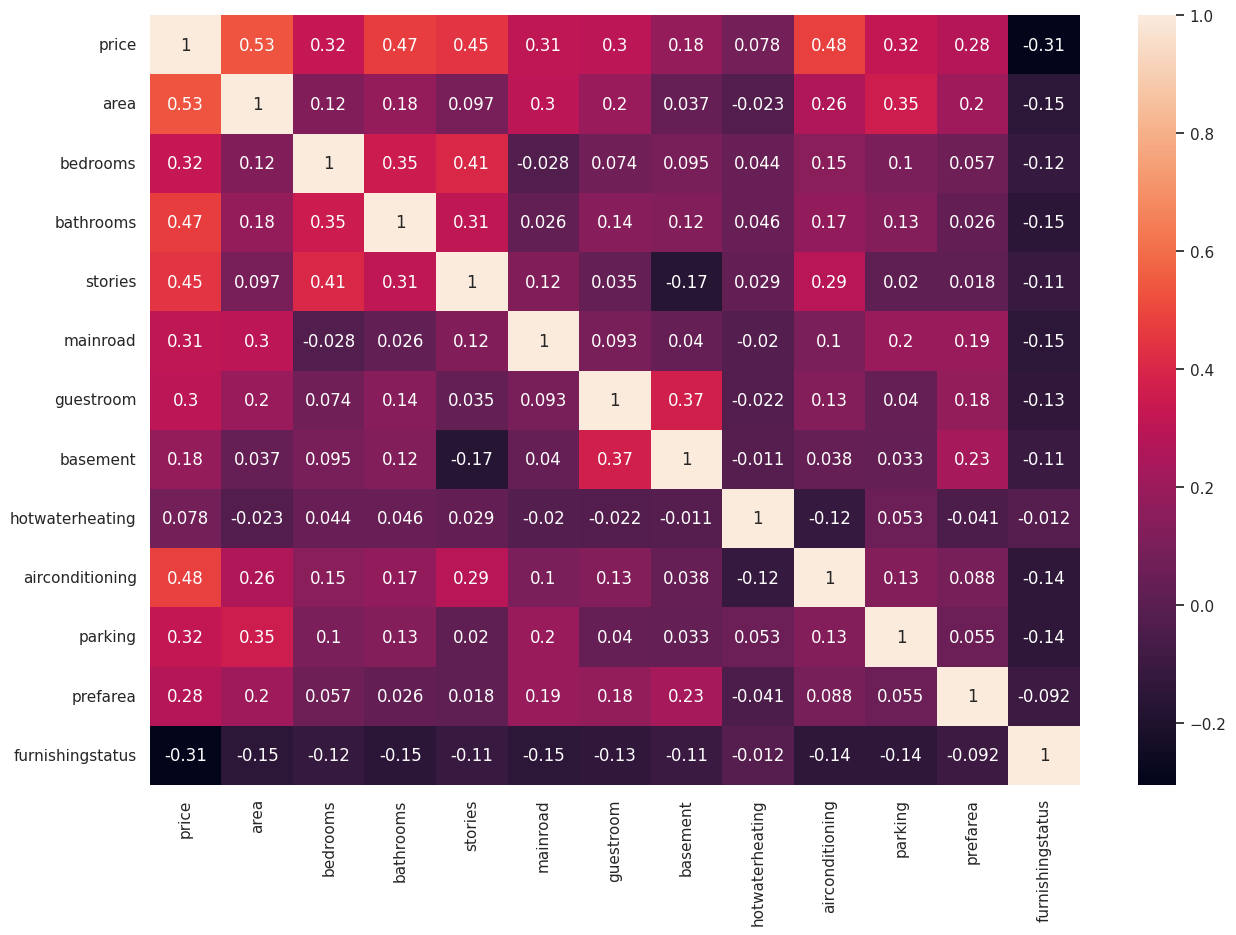

In [ ]:
plt.figure(figsize=(15, 10))  # Adjust the figure size (width, height)
sns.heatmap(corr_matrix,annot=True)